In [7]:
import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
import MeCab
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from datasets import list_datasets, load_dataset
ds = load_dataset("copenlu/answerable_tydiqa")

Using custom data configuration copenlu--nlp_course_tydiqa-2c79d6e77df16c2a
Reusing dataset parquet (/Users/hrobjarturh/.cache/huggingface/datasets/copenlu___parquet/copenlu--nlp_course_tydiqa-2c79d6e77df16c2a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 2/2 [00:00<00:00, 46.36it/s]


## 1.1 Preprocessing and Dataset Analysis

In [10]:
dfv = ds.data['validation'].to_pandas()
dft = ds.data['train'].to_pandas()

dfv = dfv.loc[dfv['language'].isin(['english', 'japanese','finnish'])].reset_index(drop=True)
dft = dft.loc[dft['language'].isin(['english', 'japanese','finnish'])].reset_index(drop=True)

dfv_eng = dfv.loc[dfv['language']=='english'].reset_index(drop=True)
dfv_jap = dfv.loc[dfv['language']=='japanese'].reset_index(drop=True)
dfv_fin = dfv.loc[dfv['language']=='finnish'].reset_index(drop=True)

dft_eng = dft.loc[dft['language']=='english'].reset_index(drop=True)
dft_jap = dft.loc[dft['language']=='japanese'].reset_index(drop=True)
dft_fin = dft.loc[dft['language']=='finnish'].reset_index(drop=True)

### (a) 

In [11]:
tbwt = TreebankWordTokenizer()
wakati = MeCab.Tagger("-Owakati")

dfv_eng['question_text_tokenized'] = [tbwt.tokenize(i) for i in dfv_eng.question_text.values]
dfv_jap['question_text_tokenized'] = [wakati.parse(i).split() for i in dfv_jap.question_text.values]
dfv_fin['question_text_tokenized'] = [tbwt.tokenize(i) for i in dfv_fin.question_text.values]

dft_eng['question_text_tokenized'] = [tbwt.tokenize(i) for i in dft_eng.question_text.values]
dft_jap['question_text_tokenized'] = [wakati.parse(i).split() for i in dft_jap.question_text.values]
dft_fin['question_text_tokenized'] = [tbwt.tokenize(i) for i in dft_fin.question_text.values]

dfv_eng['document_plaintext_tokenized'] = [tbwt.tokenize(i) for i in dfv_eng.document_plaintext.values]
dfv_jap['document_plaintext_tokenized'] = [wakati.parse(i).split() for i in dfv_jap.document_plaintext.values]
dfv_fin['document_plaintext_tokenized'] = [tbwt.tokenize(i) for i in dfv_fin.document_plaintext.values]

dft_eng['document_plaintext_tokenized'] = [tbwt.tokenize(i) for i in dft_eng.document_plaintext.values]
dft_jap['document_plaintext_tokenized'] = [wakati.parse(i).split() for i in dft_jap.document_plaintext.values]
dft_fin['document_plaintext_tokenized'] = [tbwt.tokenize(i) for i in dft_fin.document_plaintext.values]



AttributeError: module 'unidic' has no attribute 'DICDIR'

# (b)

In [ ]:
dft_eng_tokens = dft_eng.question_text_tokenized.values
dft_fin_tokens = dft_fin.question_text_tokenized.values
dft_jap_tokens = dft_jap.question_text_tokenized.values

Language: english - Total rows: 7389
Most common first words: ['How' 'What' 'When'] Least common first word: ['Are' 'Do' 'For']
Most common last word: ['metabolite' 'zombie' '?'] Least common last word: ['Are' 'By' 'Do']
---


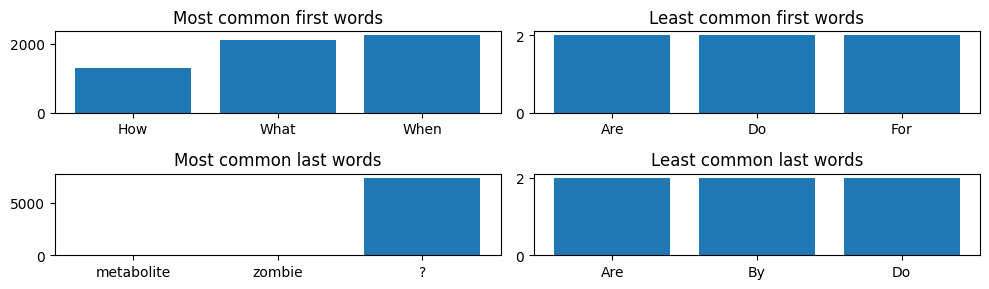

Language: finnish - Total rows: 13701
Most common first words: ['Missä' 'Mikä' 'Milloin'] Least common first word: ['Kenelle' 'Keneltä' 'Kuuluuko']
Most common last word: ['tohtoriksi+' 'tulitaistelussa' '?'] Least common last word: ['Keitä' 'Keneltä' 'Kenen']
---


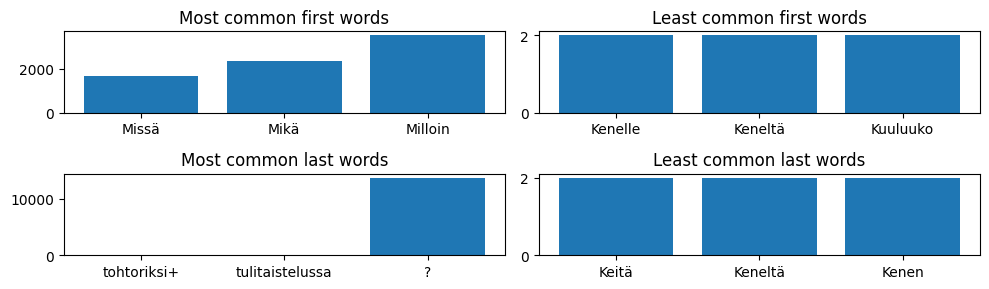

Language: japanese - Total rows: 8778
Most common first words: ['アメリカ' '『' '日本'] Least common first word: ['.' '1755' '1992']
Most common last word: ['た' 'いつ' '？'] Least common last word: ['.' 'ABC' 'BioWare']
---


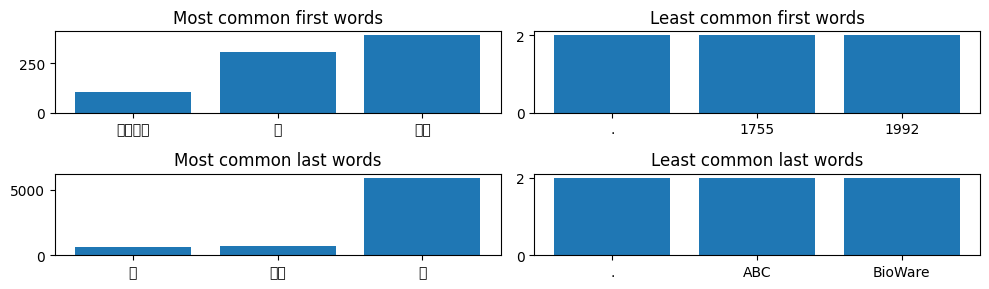

In [ ]:
for language, tokens in zip(['english', 'finnish', 'japanese'], [dft_eng_tokens,dft_fin_tokens,dft_jap_tokens]):
    first = []
    last = []
    for token in tokens:
        first.append(token[0])
        last.append(token[-1])

    first_values, first_counts = np.unique(first, return_counts=True)  
    first_common_order = sorted(range(len(first_counts)), key=lambda i: first_counts[i])
    last_values, last_counts = np.unique(last, return_counts=True)  
    last_common_order = sorted(range(len(last_counts)), key=lambda i: last_counts[i])

    first_top = first_values[first_common_order[-3:]]
    first_bottom = first_values[first_common_order[0:3]]
    last_top = last_values[last_common_order[-3:]]
    last_bottom = first_values[last_common_order[0:3]]


    print('Language: ' + language + ' - Total rows: '+str(len(tokens))+'\nMost common first words: '+str(first_top)+' Least common first word: '+str(first_bottom))
    print('Most common last word: '+str(last_top)+' Least common last word: '+str(last_bottom)+'\n---')
    fig, axs = plt.subplots(2, 2, figsize=(10, 3))
    axs[0, 0].bar(first_top,first_counts[first_common_order[-3:]])
    axs[0, 0].set_title('Most common first words')

    axs[0, 1].bar(first_bottom,first_counts[first_common_order[:3]])
    axs[0, 1].set_title('Least common first words')

    axs[1, 0].bar(last_top,last_counts[last_common_order[-3:]])
    axs[1, 0].set_title('Most common last words')

    axs[1, 1].bar(last_bottom,last_counts[last_common_order[:3]])
    axs[1, 1].set_title('Least common last words')
    fig.tight_layout()
    plt.show()

## 1.2 Binary Question Classification

In [ ]:
dfv_eng

NameError: name 'dfv_eng' is not defined

In [ ]:
dft_eng.question_text_tokenized[0]

['When', 'was', 'quantum', 'field', 'theory', 'developed', '?']

In [ ]:
dft_eng.document_plaintext_tokenized[0]

['Quantum',
 'field',
 'theory',
 'naturally',
 'began',
 'with',
 'the',
 'study',
 'of',
 'electromagnetic',
 'interactions',
 ',',
 'as',
 'the',
 'electromagnetic',
 'field',
 'was',
 'the',
 'only',
 'known',
 'classical',
 'field',
 'as',
 'of',
 'the',
 '1920s.',
 '[',
 '8',
 ']',
 ':1']

In [ ]:
dft_eng.annotations[0]

{'answer_start': array([159]), 'answer_text': array(['1920s'], dtype=object)}